In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/developer_survey_2019/survey_results_public.csv')

## Work Hours vs Job Satisfaction

In [4]:
sat_mapper_lut = {
    'Very dissatisfied' : 0,
    'Slightly dissatisfied' : 0.25,
    'Neither satisfied nor dissatisfied' : 0.5,
    'Slightly satisfied' : 0.75,
    'Very satisfied' : 1,
}

In [5]:
hours_vs_sat = df[['WorkWeekHrs','JobSat']].dropna(how='any')
hours_vs_sat = hours_vs_sat[hours_vs_sat['WorkWeekHrs'] < 100]
hours_vs_sat['JobSatNum'] = hours_vs_sat.apply(lambda row: sat_mapper_lut[row['JobSat']], axis=1)
hours_vs_sat.head()

,WorkWeekHrs,JobSat,JobSatNum
2,40.0,Slightly satisfied,0.75
3,80.0,Slightly satisfied,0.75
4,55.0,Slightly dissatisfied,0.25
5,15.0,Slightly satisfied,0.75
6,32.0,Neither satisfied nor dissatisfied,0.50


[]

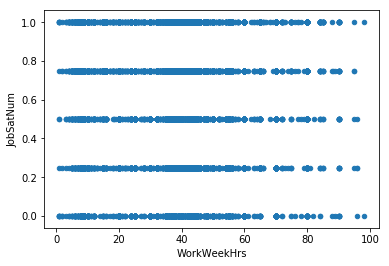

In [7]:
ax = hours_vs_sat.plot.scatter(x='WorkWeekHrs',y='JobSatNum')
ax.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C0B2485C0>,
      dtype=object)

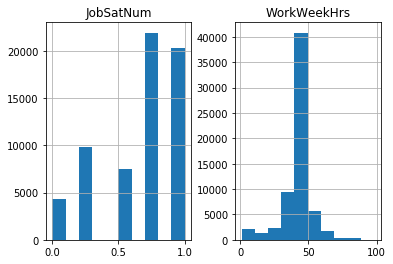

In [8]:
hours_vs_sat.hist()

In [9]:
hours_vs_sat.corr()

,WorkWeekHrs,JobSatNum
WorkWeekHrs,1.000000,0.003051
JobSatNum,0.003051,1.000000


## Conclusion
Data suggests negligible positive correlation. However this australian study suggests that satisfied people tend to work longer. 

(https://crawford.anu.edu.au/files/uploads/crawford01_cap_anu_edu_au/2016-02/working_paper_-_fabian_and_breunig_2016_overwork.pdf)

> TODO: Hypothesis: In developed countries workers have more options. Those who work longer hours, choose to work longer hours.

## Work hours vs Career Type

In [11]:
hours_vs_type = df[['WorkWeekHrs','DevType']].dropna(how='any')
hours_vs_type.head()

,WorkWeekHrs,DevType
2,40.0,"Designer;Developer, back-end;Developer, front-..."
3,80.0,"Developer, full-stack"
4,55.0,"Academic researcher;Developer, desktop or ente..."
5,15.0,Data or business analyst;Data scientist or mac...
6,32.0,"Designer;Developer, front-end"


### Remove any designation that has less than 100 candidates

In [12]:
grouped = hours_vs_type.groupby('DevType')
substantial = grouped.count()['WorkWeekHrs'] > 100
grouped.mean()[substantial].sort_values('WorkWeekHrs')

,WorkWeekHrs
DevType,
"Developer, full-stack;Student",34.168246
"Developer, back-end;Developer, front-end;Developer, full-stack;Student",35.127451
"Developer, back-end;Student",36.094767
"Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack",39.031008
Data or business analyst;Data scientist or machine learning specialist,39.678756
"Database administrator;Developer, full-stack",39.829545
"Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, mobile",40.134615
"Developer, desktop or enterprise applications;Developer, embedded applications or devices",40.351744
"Developer, front-end",40.378088


## Conclusion
Not conclusive. Managerial types tend to work longer.

In [27]:
hours_vs_country = df[['WorkWeekHrs','Country']].dropna(how='any')
hours_vs_country = hours_vs_country[hours_vs_country['WorkWeekHrs'] < 100]
hours_vs_country.head()

,WorkWeekHrs,Country
2,40.0,Thailand
3,80.0,United States
4,55.0,Ukraine
5,15.0,Canada
6,32.0,Ukraine


In [29]:
grouped = hours_vs_country.groupby('Country')
substantial = grouped.count()['WorkWeekHrs'] > 100
mean = grouped.mean()[substantial].sort_values('WorkWeekHrs')
mean

,WorkWeekHrs
Country,
Indonesia,36.270758
Argentina,36.751152
Nigeria,37.153527
Latvia,37.203704
Finland,37.307263
Denmark,37.420354
Netherlands,37.968512
Austria,38.043716
Kenya,38.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C0B708C50>]],
      dtype=object)

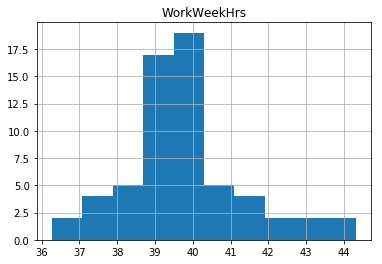

In [31]:
mean.hist()

# Conclusion
Typically 7 to 9 hours a day.